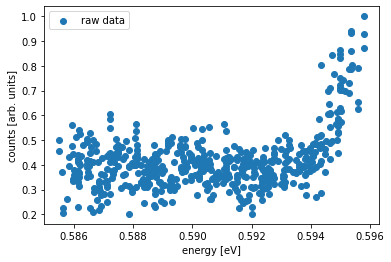

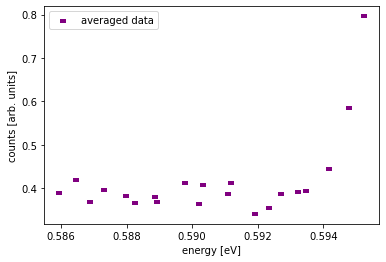

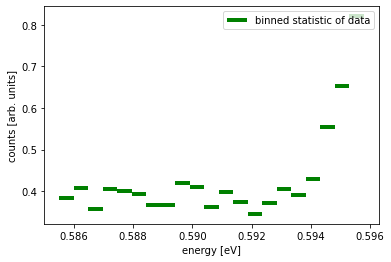

{'energy': 0.5938161973834697, 'energy_error': 0.0004067041157683247}


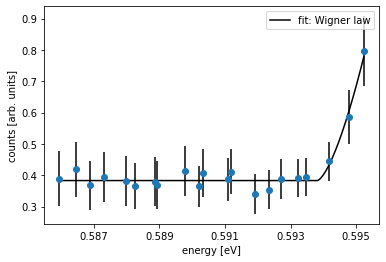

In [199]:
import pandas as pd 
import numpy as np
import glob
import math
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
import matplotlib as mpl
import scipy.stats as stats

count = 0
for filename in glob.glob(r"/Users/mac/Desktop/Gunilla/Rh 2022/enero/*.txt"):
    count+=1
    
    df = pd.read_csv(filename, 'r', , delimiter=" ", skiprows=0 )
    #df = pd.read_csv(r'/Users/mac/Desktop/Gunilla/Rh 2022/enero/16_01_2023_2075_to_2110_105_steps.h5.txt', delimiter=" ", skiprows=0)

#Calculate energy from frequency in THz
x = 1239.842/532.2 - df["frequency"]*4.135667516e-3 

#Calculate Signal: Number of counts
df['counts'] = df['A_Counts']-df['B_Counts']

#Normalize the signal by the ion current and laser power
norm = (df['Power_[W]']*df['ion_beam'])
y = df['counts']/norm

#Normalizing the cross section to 1.
y_norm = y/y.max()

#Error propagation: 
counts_sd = np.sqrt(df['counts'])
x_sd = df['frequency_std']*4.135667516e-3 
y_sd = np.sqrt((counts_sd/(df['Power_[W]']*df['ion_beam']))**2+((df['counts']*df['ion_beam_std'])/(df['Power_[W]']*df['ion_beam']**2))**2+((df['counts']*df['Power_[W]_std'])/(df['ion_beam']*df['Power_[W]']**2))**2)/y.max()

#Plotting original data
plt.xlabel("energy [eV]")
plt.ylabel("counts [arb. units]")
plt.scatter(x ,y_norm, label='raw data')
plt.legend()
plt.show()

#Binning data by averaging every n values
def binning(n, x):
    return [sum(x[a:a+n])/n for a in range(0,len(x),n)]

def binning_error(n, x):
    return [np.sqrt(sum((x[c:c+n])**2)/n) for c in range(0,len(x),n)]

n=25
x_avg, y_avg, x_err, y_err = binning(n, x), binning(n, y_norm), binning_error(n, x_sd), binning_error(n, y_sd)


plt.scatter(x_avg, y_avg, marker = '_', c='purple',linewidths = 4, label = 'averaged data')
plt.xlabel("energy [eV]")
plt.ylabel("counts [arb. units]")
plt.legend()
plt.show()

#Binning data using binned_statistics
bin_means,bin_edges, binnumber = stats.binned_statistic(x, y_norm,statistic= "mean", bins=21)
plt.hlines(bin_means, bin_edges[:-1], bin_edges[1:], colors='g', lw=4, label='binned statistic of data')
bin_edges_x = (bin_edges[:-1]+bin_edges[1:])/2
plt.xlabel("energy [eV]")
plt.ylabel("counts [arb. units]")
plt.legend()
plt.show()
#plt.scatter(bin_edges_x, bin_means, marker = '_', c='b',linewidths = 4, label='binned statistic of data middle point' )
#plt.scatter(x_av, y_avg, marker = '_', c='purple',linewidths = 4, label = 'averaged data' )
#plt.figure()

#Fitting our data to the Wigner law.
# In this case we consider l=1
def Wigner_law(x, A, E, B):  
    return A  + B * (0.5*(np.abs(x - E)+(x - E)))**(3/2)

#Fitting using binned_statistics
#binparam, bincov = curve_fit(Wigner_law,bin_edges, bin_means, sigma = y_err, absolute_sigma=True,  maxfev=500000, p0=[0.4,0.594,0.9])
#Fitting using averaged counts
binparam, bincov = curve_fit(Wigner_law, x_avg, y_avg, sigma = y_err ,absolute_sigma=True,  maxfev=500000, p0=[0.4,0.590,0.6])
#Fitting using original data:
#binparam, bincov = curve_fit(Wigner_law, x, y_norm, sigma = y_sd ,absolute_sigma=True,  maxfev=500000, p0=[0.1,0.594,1.0]
# fit parallel data
#sigma = err,
# std deviation
binerr = np.sqrt(np.diag(bincov))

threshold = {'energy': binparam[1], 'energy_error' : binerr[1]}
print(threshold)

x_data = np.linspace(min(x_avg),max(x_avg),400)
#e_data = 
plt.plot(x_data, Wigner_law(x_data,*binparam), label='fit: Wigner law', c='black')
plt.xlabel("energy [eV]")
plt.ylabel("counts [arb. units]")
plt.xticks(np.arange(0.585,0.596, step=0.002))
#plt.errorbar(x_avg, y_avg, y_sd22,fmt='o',ecolor='black', label= 'errors using avg. values' )
plt.errorbar(x_avg, y_avg, y_err,fmt='o',ecolor='black' )
#plt.scatter(bin_edges_x, bin_means)
#plt.scatter(x_avg, y_avg, s = 2, marker = 'o', c='black',linewidths = 3 )
#plt.hlines(bin_means, bin_edges[:-1], bin_edges[1:], colors='g', lw=4, label='binned statistic of data')
plt.legend()
plt.show()




{0.5938161973834697: 0.5938161973834697, 0.0004067041157683247: 0.0004067041157683247}


In [151]:
t_values = [5.93816196e-01, 0.5894475, 5.87823496e-01, 0.58935936, 0.58638586]
t_delta = [8.13424584e-05, 9.64037145e-04, 5.70622951e-04, 1.99085769e-03, 1.53023603e-03 ]
steps = [105,70, 80, 70,70 ]
file_name = ['16_01_2023_2075_to_2110_105_steps','11_01_2023_2075_to_2110_70_steps','03_01_2023_2085.2_to_2125.2_80_steps', '12_01_2023_2075_to_2110_70_steps2', '16_01_2023_2075_to_2110_70_steps' ]

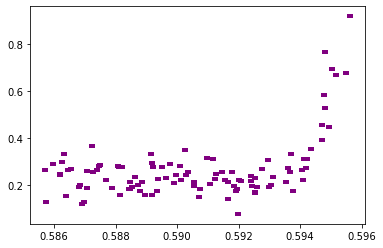

In [449]:
n = 5
x_avg = [sum(x[a:a+n])/n for a in range(0,len(x),n)]
y_avg = [sum(y_norm[b:b+n])/n for b in range(0,len(y_norm),n)]
x_sd_avg = [sum(x_sd[c:c+n])/n for c in range(0,len(x_sd),n)]
y_sd_avg = [sum(y_sd2[d:d+n])/n for d in range(0,len(y_sd2),n)]
plt.scatter(x_avg, y_avg, marker = '_', c='purple',linewidths = 4)

In [ ]:
#Data binning averaging every 5 counts
x_av, y_av, x_sd_av, y_sd_av  = [], [], [],[]
def binning_av(n, x, y, sd_x, sd_y):
    for a, b, c, d in zip(x, y, sd_x, sd_y):
        x_av.append(sum(x[a:a+n])/n for a in range(0,len(x),n))
        y_av.append(sum(y[b:b+n])/n for b in range(0,len(y),n))
        x_sd_av.append(sum(sd_x[c:c+n])/n for c in range(0,len(sd_x),n))
        x_sd_av.append(sum(sd_y[d:d+n])/n for d in range(0,len(sd_y),n))
    return(x_av, y_av, x_sd_av, y_sd_av)

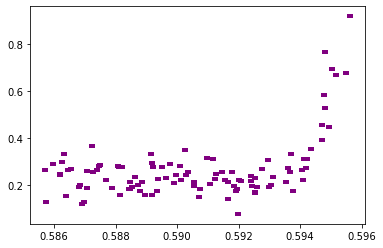

In [452]:
#Averaging every 5 counts...
n = 5
list2 = [sum(y_norm[i:i+n])/n for i in range(0,len(y_norm),n)]
#y_vals = list2.reverse()
x_av = [sum(x[j:j+n])/n for j in range(0,len(x),n)]
plt.scatter(x_av, list2, marker = '_', c='purple',linewidths = 4 )
#print(list2)
list_x = []
for i in x_av:
    list_x.insert(0,i)
#print(list_x)


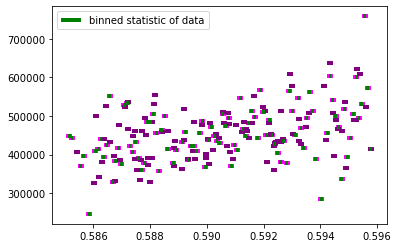

In [342]:
bin_means,bin_edges, misc = binned_statistic(x, counts_y,statistic= "mean", bins=105)
plt.figure()
#plt.plot(x,counts_y, 'b.', label='raw data')
plt.hlines(bin_means, bin_edges[:-1], bin_edges[1:], colors='g', lw=4, label='binned statistic of data')
bin_edges_x = (bin_edges[:-1]+bin_edges[1:])/2
#plt.scatter(list_x, bin_means, marker = '_', c='magenta',linewidths = 1 )
plt.scatter(bin_edges_x, bin_means, marker = '_', c='magenta',linewidths = 4 )
plt.scatter(x_av, list2, marker = '_', c='purple',linewidths = 4 )
plt.legend()

In [416]:
df['y_cut'] = pd.qcut(counts_y, q=105)
df['x_cut'] = pd.qcut(x, q = 105)


In [321]:
y_grouped = counts_y.groupby(y_cut)
x_grouped = x.groupby(x_cut)
print(y_grouped.value_counts())


(182851.17500000002, 228871.678]  182851.176397    1
                                  191278.897830    1
                                  200954.487880    1
                                  217428.542709    1
                                  227509.849342    1
                                                  ..
(744797.433, 875195.864]          747369.929168    1
                                  758312.845703    1
                                  813362.455917    1
                                  846220.520857    1
                                  875195.864104    1
Length: 525, dtype: int64


In [263]:
x_splitted = [x[i:i+5] for i in range(0, len(x), 5)]
y_splitted = [counts_y[i:i+5] for i in range(0, len(counts_y), 5)]


In [366]:
print(len(bin_edges_x))

105


In [347]:
y_complete = np.nan_to_num(bin_means, copy=True, nan=0.0, posinf=None, neginf=None)
print(len(y_complete))


105


In [368]:
normalized_y = y_complete/np.linalg.norm(y_complete)
normalized_x = bin_edges_x/np.linalg.norm(bin_edges_x)
print(normalized_y, normalized_x)

[0.09939984 0.09800101 0.         0.         0.08207602 0.08744208
 0.         0.0544778  0.         0.09061147 0.09195755 0.09747056
 0.08734688 0.09390393 0.12237976 0.07267193 0.08478996 0.09234794
 0.08308162 0.11704833 0.11786186 0.09353751 0.09019299 0.09578584
 0.08654964 0.07986293 0.08391064 0.10718999 0.10728865 0.11193761
 0.10084997 0.07929418 0.10280385 0.11047769 0.09158945 0.
 0.08375176 0.09143598 0.         0.09589118 0.1013006  0.08535327
 0.09343857 0.09368904 0.09049296 0.10089481 0.10758631 0.08135775
 0.09712816 0.10447898 0.09927596 0.09637984 0.09531514 0.11159411
 0.10470329 0.10973358 0.0821885  0.09388493 0.09094963 0.12098895
 0.1030694  0.09920543 0.10657214 0.11356216 0.10986526 0.09821074
 0.1255461  0.11270968 0.09987573 0.10837245 0.09980885 0.09475141
 0.08938043 0.08409358 0.09647051 0.08368664 0.12504538 0.11370181
 0.09958975 0.12105221 0.10398027 0.09244341 0.10971989 0.12419977
 0.11379865 0.08615976 0.         0.06302309 0.         0.10107448
 0.

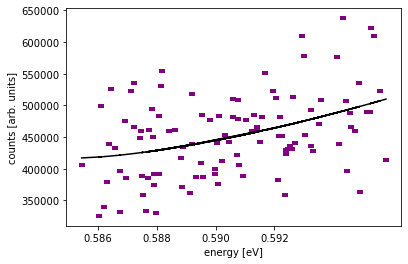

In [383]:
# defining Wigner fitting function
def Wigner_law(x, A, E, B):  
    return A  + B * (0.5*(np.abs(x - E)+(x - E)))**(3/2)

#here it should be 
#l=1

#binparam, bincov = curve_fit(Wigner_law, bin_edges_x ,y_complete,  absolute_sigma=True,  maxfev=500000, p0=[0.44e6,0.591,0.65e6])
binparam, bincov = curve_fit(Wigner_law, x_av, list2,  absolute_sigma=True,  maxfev=500000, p0=[0.44e6,0.591,0.65e6])
# fit parallel data
#sigma = err,
# std deviation
binerr = np.sqrt(np.diag(bincov))

x_data = np.linspace(0.585,0.596,400)
plt.plot(x_av, Wigner_law(x_av,*binparam), label='fit', c='black')
plt.xlabel("energy [eV]")
plt.ylabel("counts [arb. units]")
plt.xticks(np.arange(0.582,0.592, step=0.002))
#plt.scatter(bin_edges_x, bin_means)
plt.scatter(x_av, list2, marker = '_', c='purple',linewidths = 4 )
#plt.hlines(bin_means, bin_edges[:-1], bin_edges[1:], colors='g', lw=4, label='binned statistic of data')
plt.show()





In [198]:
list1 = [sum(x[j:j+5])/5 for j in range(0,len(x),5)]

print(list1)
print(x[0:5]/5)

[0.595803098263957, 0.5952541644800039, 0.5955997823192758, 0.5953970526545259, 0.5953053526948937, 0.5951717877602227, 0.594755002989951, 0.5948776247885496, 0.5946175835473011, 0.594906808314746, 0.5944561856041537, 0.5945621063322051, 0.5933098011741752, 0.594487943290855, 0.5943411855791491, 0.5941334411879788, 0.593252275388912, 0.5941895067905899, 0.5936035994155837, 0.5925167347430185, 0.5922741192486065, 0.5935069806475319, 0.5932482495028475, 0.5930392956279766, 0.5926216179097163, 0.5923530484475413, 0.5923854168464844, 0.592455128943144, 0.592992811718507, 0.592598865879691, 0.5929358314325125, 0.5919651304025452, 0.5926960109880117, 0.5904435948002652, 0.5921980740089878, 0.5924059132458779, 0.5921647897210155, 0.5921089354763261, 0.5916657782029053, 0.5920468098224287, 0.5888719620753539, 0.5915017570667479, 0.5915832842265555, 0.5912983416200497, 0.5908046102097527, 0.5914081638122399, 0.5913926875986462, 0.5907561023163941, 0.5912496453226522, 0.5910228230950028, 0.59093

In [91]:
counts_y.max()-counts_y.min()

545479.8888913875

In [100]:
binned_y = pd.qcut(counts_y, q = 105)
binned_y

0       (341323.66, 343731.938]
1      (343731.938, 345026.075]
2      (317218.426, 319513.829]
3       (337185.864, 341323.66]
4       (453948.925, 455603.79]
                 ...           
520    (480259.448, 484285.073]
521    (509223.311, 514152.281]
522     (319513.829, 323815.52]
523    (317218.426, 319513.829]
524    (426822.788, 427517.024]
Length: 525, dtype: category
Categories (105, interval[float64, right]): [(117183.242, 224531.833] < (224531.833, 234842.848] < (234842.848, 255153.86] < (255153.86, 264581.37] ... (584641.172, 594001.981] < (594001.981, 620115.593] < (620115.593, 635591.814] < (635591.814, 662663.132]]

In [101]:
binned_y2 = pd.cut(counts_y, bins = 105)
binned_y2

0      (340570.245, 345765.291]
1      (340570.245, 345765.291]
2      (314595.012, 319790.059]
3      (335375.198, 340570.245]
4      (449666.223, 454861.269]
                 ...           
520    (475641.455, 480836.502]
521    (512006.781, 517201.828]
522    (319790.059, 324985.105]
523    (314595.012, 319790.059]
524     (423690.99, 428886.036]
Length: 525, dtype: category
Categories (105, interval[float64, right]): [(116637.763, 122378.289] < (122378.289, 127573.336] < (127573.336, 132768.382] < (132768.382, 137963.429] ... (641882.945, 647077.992] < (647077.992, 652273.039] < (652273.039, 657468.085] < (657468.085, 662663.132]]

In [172]:

def binning(n, x):
    return [sum(x[a:a+n])/n for a in range(0,len(x),n)]

def binning_error(n, x):
    return [np.sqrt((sum((x_sd[c:c+n])**2)/n)) for c in range(0,len(x_sd),n)]

    

In [173]:
binning(25, x)

[0.643420239897774, 0.625154392350679, 0.6078932974294404, 0.5920214175115547]